<a href="https://colab.research.google.com/github/PhilipZubel/cnn-image-classifier/blob/main/DL_Coursework_2479229z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 2023 - Coursework
## Classifying Plankton!

The aim of this coursework will be for you to design a deep learning architecture to predict identify plankton species from images. 

***Your aim is to design a model that, when given a new image of a plankton speciment would return to which species it belongs to.***

You are free to use any architecture you prefer, from what we have seen in class. You can decide to use unsupervised pre-training of only supervised end-to-end training - the approach you choose is your choice. 

### Hand-in date: Thursday 16th of March before 4:30pm (on Moodle)

### Steps & Hints
* First, look at the data. What are the different classes? How different are they? What type of transformations for your data augmentation do you think would be acceptable here?. 
* You will note that it is *very* imbalanced (large differences in number of samples between classes) --- this will be one challenge to look for. 
* Also, note that the dataset is rather small (hint: you will need to think about data augmentation!). 
* Second, try and load the data and separate into training, validation and test set (or better, use cross-validation)
* Write a DataLoader class for the data (Hint: you will want to put the data augmentation in the data loader). 
* Think about pre-processing of the input? The output? Normalisation or not? Data augmentation? Which one? 
* Design a network for the task. What layers? How many? Do you want to use an Autoencoder for unsupervised pre-training? 
* Choose a loss function for your network
* Select optimiser and training parameters (batch size, learning rate)
* Optimise your model, and tune hyperparameters (especially learning rate, momentum etc)
* Analyse the results on the test data. How to measure success? Which classes are recognised well, which are not? Is there confusion between some classes? Look at failure cases. 
* If time allows, go back to drawing board and try a more complex, or better, model. 
* Explain your thought process, justify your choices and discuss the results!

### Submission
* submit TWO files on Moodle: 
  * **your notebook**: use `File -> download .ipynb` to download the notebook file locally from colab. 
  * **a PDF file** of your notebook's output as you see it: use `File -> print` to generate a PDF. 
* your notebook must clearly contains separate cells for: 
  * setting up your model and data loader
  * training your model from data
  * loading your pretrained model (eg, from github/gitlab)
  * testing your model on test data. 
* The training cells must be disabled by a flag, such that when running *run all* on your notebook it does
  * load the data
  * load your model 
  * apply the model to the test data
  * analyse and display the results and accuracy 
* In addition provide markup cell:
  * containing your student number at the top
  * to describe and motivate your design choices: architecture, pre-processing, training regime
  * to analyse, describe and comment on your results
  * to provide some discussion on what you think are the limitations of your solution and what could be future work

* **Note that you must put your trained model on a github so that your code can download it.**


### Assessment criteria 
* In order to get a pass mark, you will need to demonstrate that you have designed and trained a deep NN to solve the problem, using sensible approach and reasonable efforts to tune hyper-parameters. You have analysed the results. It is NOT necessary to have any level of accuracy (a network that predicts poorly will always yield a pass mark if it is designed, tuned and analysed sensibly). 
* In order to get a good mark, you will show good understanding of the approach and provide a working solution. 
* in order to get a high mark, you will demonstrate a working approach of gradual improvement between different versions of your solution. 
* bonus marks for attempting something original if well motivated - even if it does not yield increased performance. 
* bonus marks for getting high performance, and some more points are to grab for getting the best performance in the class. 

### Notes
* make sure to clearly set aside training, validation and test sets to ensure proper setting of all hyperparameters. 
* I recommend to start with small models that can be easier to train to set a baseline performance before attempting more complex one. 
* Be mindful of the time!

### GUID: 2479229z
## Explanation of the proposed solution

#### Dataset Augmentations and handling unbalanced dataset

Several augmentation techniques were tested to improve the performance of models in plankton classification. The most successful ones were horizontal and vertical image flips, as well as random rotations. However, image normalization did not affect the results. Grayscaling the images was also proposed, but it did not impact the results either. Another approach was to crop the image from 100x100 to 80x80, as the planktons were mostly in the center, and then randomly crop a section of 50x50. Unfortunately, this method produced diminishing results. Modifying the values of hue, contrast, and brightness also did not improve the model's predictions or convergence.

To address the issue of an unbalanced dataset in the plankton classification task, class weights were calculated and used in Cross Entropy Loss. The class weights were computed as the inverse frequency of the total number of samples in the dataset. These weights were then scaled to ensure that they sum up to 1. By using class weights, the model can assign a higher weight to the underrepresented classes, allowing for better learning and classification performance. This feature has slightly increased the performance of the proposed models.

#### Proposed Architectures

The LeNet5 architecture is used which was originally proposed by Yann LeCun (1998) for handwritten digit recognition. It is a relatively simple convolutional neural network (CNN) architecture that consists of two convolutional layers, two max-pooling layers, and three fully connected layers. However, the standard LeNet5 architecture was designed for images of size 32x32, while the images in the plankton dataset are 100x100. Therefore, the linear layers in the original LeNet5 architecture were modified to accommodate the larger image size.

During experimentation, it was found that LeNet5 was prone to overfitting the images (regardless of applying different augmentations). To mitigate overfitting, dropout layers were added to the network. Dropout is a regularization technique that randomly drops out (sets to zero) some of the neurons in the network during training, forcing the network to learn redundant representations and preventing overfitting. Different dropout values between 0.25 and 0.8 were tried, and a value of 0.5 was ultimately selected as it produced the best results (between overfitting and low convergance). The model is trained from scratch (no pre-trained weights).

Another architecture that was adapted for this task was AlexNet, which was proposed by Alex Krizhevsky (2012). AlexNet is a deeper CNN architecture that consists of five convolutional layers, three max-pooling layers, and three fully connected layers. However, like LeNet5, the standard AlexNet architecture was designed for images of size 227x227, which differs from the 100x100 images in the plankton dataset.
The model is trained from scratch (no pre-trained weights).

To address this issue, two approaches were considered: resizing the images to 227x227 or modifying the linear layers to have fewer connections between nodes. Resizing the images did not produce better results since it did not add any new useful information that the network could take advantage of. Therefore, the linear layers were modified to match the input size of 100x100. By doing so, the architecture could leverage the inherent spatial information present in the original image size.  The model is trained from scratch (no pre-trained weights).


### Training process

To train the deep learning models, the dataset was split into train, test, and validation sets in a ratio of 80:10:10. Since the number of samples in each class was imbalanced, training weights were assigned to each class while computing the cross-entropy loss to give more importance to the less popular classes. The model was trained for 200 epochs, as both models exhibited overfitting on the training set beyond this threshold. The train set was used for fine-tuning the model, and the best learned weights were determined by evaluating the model's loss on the validation dataset. Hyperparameter tuning was performed on the learning rate and momentum. The learning rate was bounded between 1e-3 and 1e-2, and the momentum was bounded between 1e-5 and 1e-2. Increasing the learning rate boundaries resulted in the optimizer suggesting extremely small learning rates (on the order of 10e-5). To avoid such values for the learning rate, a higher low boundary of 1e-3 was chosen.


### Results

|   model |     train |      test | validation|
|--------:|----------:|----------:|-----------|
|  LeNet5 | 45.131376 | 44.444444 | 52.795031 |
| AlexNet | 76.970634 | 71.604938 | 72.049689 |

Comparing the accuracy of AlexNet and LeNet5, it can be observed that AlexNet performs significantly better overall and particularly on the test set, with an accuracy rate above 70%, whereas LeNet5 performs well only 45% of the time. The main difference between these models is that AlexNet is capable of accurately identifying plankton images from classes 0.0, 1.0, and 3.0, whereas LeNet5 struggles to distinguish between them. On the other hand, both models face difficulty in differentiating between classes 7.0, 8.0, and 10.0, which can be attributed to the fact that the majority of images labeled under these classes are heavily cropped and have low resolution. As a result, these plankton types may not have significant differences among them and can be challenging to differentiate with the naked eye.


### Data 
The following cells will show you how to download the data and view it. 

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import collections

dtype = torch.float

# Loading the data
# we will use wget to get the archive
!wget --no-check-certificate "https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1" -O plankton.pt

--2023-03-11 20:54:15--  https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/v2udcnt98miwwrq/plankton.pt [following]
--2023-03-11 20:54:15--  https://www.dropbox.com/s/dl/v2udcnt98miwwrq/plankton.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b40a8af47e7ecb127e282a720.dl.dropboxusercontent.com/cd/0/get/B4Gk2QULvPgIBmMxcHDzKX2KH7fITHwtsSRdEuUUxE3PNKI4wnVP8qz1McUX37pyqHPcnC9tFWKE7ecvp5IcKBmZ6co8SF5_EHj77yoNYWg7xYk_nQUBZ_mCGvYSWuuTUKxBcfX8-mAGgxdXBuOqSORqkgfahYdr95-TWv2LQhh78w/file?dl=1# [following]
--2023-03-11 20:54:16--  https://uc0b40a8af47e7ecb127e282a720.dl.dropboxusercontent.com/cd/0/get/B4Gk2QULvPgIBmMxcHDzKX2KH7fITHwtsSRdEuUUxE3PNKI4wnVP8qz1McUX37pyqHPcnC9tFWKE7ecvp

The classes in this dataset are: 
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

And the numbers of examples per class are: 
2.0     257
8.0     235
7.0     219
10.0    157
11.0    135
0.0     134
3.0     110
6.0      92
9.0      76
4.0      70
5.0      67
1.0      65
dtype: int64


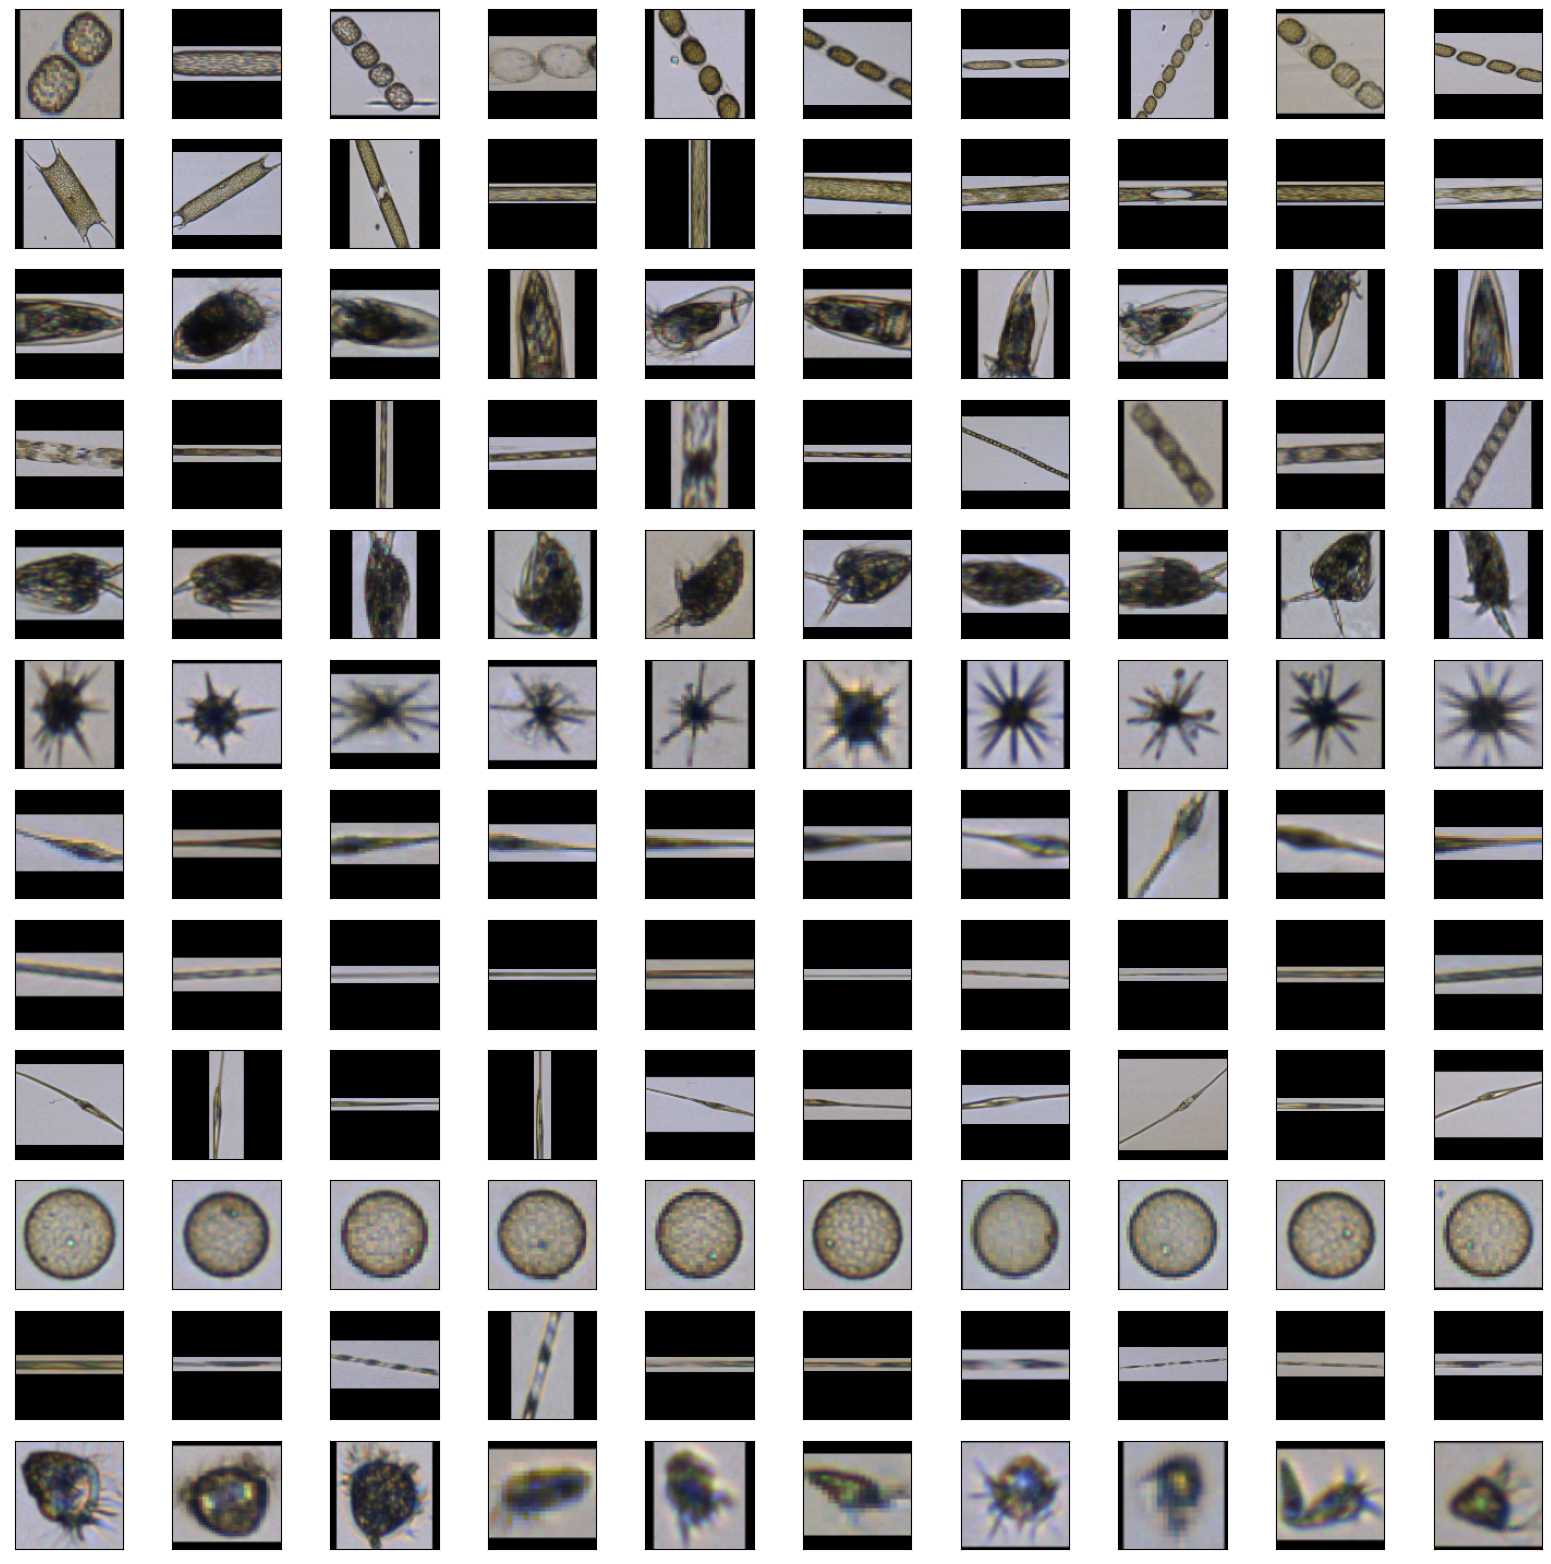

In [2]:
plankton_data = torch.load('plankton.pt')

# get the number of different classes
classes = plankton_data['labels'].unique()
nclasses = len(classes)
print('The classes in this dataset are: ')
print(classes)

# display the number of instances per class: 
print('\nAnd the numbers of examples per class are: ')
print( pd.Series(plankton_data['labels']).value_counts() )

# we now print some examples from each class for visualisation
fig = plt.figure(figsize=(20,20))

n = 10 # number of examples to show per class

for i in range(nclasses): 
  idx = plankton_data['labels'] == classes[i]
  imgs = plankton_data['images'][idx,...]
  for j in range(n):
    ax = plt.subplot(nclasses,n,i*n+j+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow( imgs[j,...].permute(1, 2, 0) ) # note the permute because tensorflow puts the channel as the first dimension whereas matplotlib expects WxHx3
plt.show()


### Class Weights
Get class weights as the dataset is imbalanced

In [3]:
def get_class_weights(data):

  num_classes = len(data['labels'].unique())
  counts = pd.Series(data['labels']).value_counts()
  total_samples = counts.sum()

  freqs = []
  for label in data['labels'].unique():
    l = label.item()
    count = counts.loc[l]
    freqs.append(count)

  class_weights = torch.FloatTensor([total_samples / (num_classes * freq) for freq in freqs])
  class_weights = class_weights / class_weights.sum()
  print("Class weights:", class_weights)
  return class_weights
  

### Load Datasets
Load datasets and image transformations

In [4]:
from torch.utils.data import Dataset, random_split
import torchvision.transforms as transforms


class PlanktonDataset(Dataset):
  def __init__(self, data=plankton_data):
    self.labels = data['labels']
    self.images = data['images']
  
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, idx):
    return self.images[idx], self.labels[idx]

class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

def get_transformations():
    train_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(degrees=(0, 180)),
        transforms.RandomInvert(p=0.5),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        # transforms.CenterCrop(80),
        transforms.ToTensor(),
        ])

    test_transforms = transforms.Compose([
        transforms.ToPILImage(),
        # transforms.CenterCrop(80),
        transforms.ToTensor(),
        ])

    return train_transforms, test_transforms

In [5]:
from torch.utils.data import DataLoader

def get_data_loaders(data):
    dataset = PlanktonDataset(data)
    train_split, test_split, valid_split = random_split(dataset, [0.8, 0.1, 0.1], generator=torch.Generator().manual_seed(42))

    device = "cuda" if torch.cuda.is_available() else "cpu"
    kwargs = {'num_workers': 6, 'pin_memory': True} if device=='cuda' else {}

    train_transforms, test_transforms = get_transformations()

    train_dataset = DatasetFromSubset(subset = train_split, transform = train_transforms)
    test_dataset = DatasetFromSubset(subset = test_split, transform = test_transforms)
    valid_dataset = DatasetFromSubset(subset = valid_split, transform = test_transforms)


    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=16, **kwargs)
    test_loader = DataLoader(test_dataset, shuffle=True, batch_size=16, **kwargs)
    valid_loader = DataLoader(valid_dataset, shuffle=True, batch_size=64, **kwargs)

    return train_loader, test_loader, valid_loader

## Networks

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet5(nn.Module):
    def __init__(self, dropout=0.5):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(7744, 400)
        self.fc2 = nn.Linear(400, 84)
        self.fc3 = nn.Linear(84, 12)
        self.dropout = nn.Dropout(p=dropout)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x



In [7]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=12):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 512),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(512, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [8]:
loaders = get_data_loaders(plankton_data)
models = [
    ("LeNet5", LeNet5), 
    ("AlexNet", AlexNet)
]

### Hyperparameter optimization

In [18]:
%%script echo skipping
print("cell skipped")

!pip3 install ax-platform 
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting
# from ax.utils.tutorials.cnn_utils import load_mnist, evaluate, CNN

skipping


In [10]:
%%script echo skipping
print("cell skipped")

# adapted from https://ax.dev/api/_modules/ax/utils/tutorials/cnn_utils.html
# changed num of epochs to 10
# changed labels to torch type long

import torch.optim as optim
from typing import Dict, List, Optional, Tuple

def train(
    net: torch.nn.Module,
    train_loader: DataLoader,
    parameters: Dict[str, float],
    device: torch.device,
) -> nn.Module:
    """
    Train CNN on provided data set.

    Args:
        net: initialized neural network
        train_loader: DataLoader containing training set
        parameters: dictionary containing parameters to be passed to the optimizer.
            - lr: default (0.001)
            - momentum: default (0.0)
            - weight_decay: default (0.0)
            - num_epochs: default (1)
        dtype: torch dtype
        device: torch device
    Returns:
        nn.Module: trained CNN.
    """
    # Initialize network
    net.to(device=device)
    net.train()
    # Define loss and optimizer
    criterion = nn.NLLLoss(reduction="sum")
    optimizer = optim.SGD(
        net.parameters(),
        lr=parameters.get("lr", 0.001),
        momentum=parameters.get("momentum", 0.0),
        weight_decay=parameters.get("weight_decay", 0.0),
    )
    scheduler = optim.lr_scheduler.StepLR(
        optimizer,
        step_size=int(parameters.get("step_size", 30)),
        gamma=parameters.get("gamma", 1.0),  # default is no learning rate decay
    )
    num_epochs = parameters.get("num_epochs", 10) 

    # Train Network
    # pyre-fixme[6]: Expected `int` for 1st param but got `float`.
    for _ in range(num_epochs):
        for inputs, labels in train_loader:
            # move data to proper dtype and device
            inputs = inputs.to(dtype=dtype, device=device)
            labels = labels.long()
            labels = labels.to(device=device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
    return net

def evaluate(
    net: nn.Module, data_loader: DataLoader, device: torch.device
) -> float:
    """
    Compute classification accuracy on provided dataset.

    Args:
        net: trained model
        data_loader: DataLoader containing the evaluation set
        dtype: torch dtype
        device: torch device
    Returns:
        float: classification accuracy
    """
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            # move data to proper dtype and device
            inputs = inputs.to(device=device)
            labels = labels.long()
            labels = labels.to(device=device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [11]:
%%script echo skipping
print("cell skipped")

def train_evaluate(parameterization, loaders, net):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_loader, _, valid_loader = loaders
    net = train(net=net, train_loader=train_loader, parameters=parameterization, device=device)
    accuracy = evaluate(
        net=net,
        data_loader=valid_loader,
        device=device,
    )
    
    return accuracy


models_params = {}

for model_name, model_class in models:
    best_parameters, values, experiment, model = optimize(
        parameters=[
            {"name": "lr", "type": "range", "bounds": [1e-3, 1e-2], "log_scale": True},
            {"name": "momentum", "type": "range", "bounds": [1e-5, 1e-2], "log_scale": True},
            # {"name": "weight_decay", "type": "range", "bounds": [1e-5,1e-1], "log_scale": True},
        ],
        evaluation_function=lambda params:train_evaluate(params, loaders=loaders, net=model_class()),
        objective_name='accuracy',
    )

    models_params[model_name] = best_parameters

[INFO 03-11 20:54:28] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03-11 20:54:28] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter momentum. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 03-11 20:54:28] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='lr', parameter_type=FLOAT, range=[0.001, 0.01], log_scale=True), RangeParameter(name='momentum', parameter_type=FLOAT, range=[1e-05, 0.01], log_scale=True)], parameter_constraints=[]).
[INFO 03-11 20:54:28] ax.modelbridge.dispatch_utils: Using Bayesian optimization since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO

Optimized parameters

In [12]:
%%script echo skipping
print("cell skipped")

models_params

{'LeNet5': {'lr': 0.002889363826352766, 'momentum': 0.00034033127680783217},
 'AlexNet': {'lr': 0.007058176857987975, 'momentum': 0.00034435886343996445}}

### Training models

In [13]:
%%script echo skipping
print("cell skipped")

import matplotlib.pyplot as plt

def get_loss(loader, net, criterion):
  loss_list = []
  with torch.no_grad():
      for t_data in loader:
          target, labels = t_data
          labels = labels.long()
          target, labels = target.cuda(), labels.cuda()
          outputs = net(target)
          loss = criterion(outputs, labels)
          loss_list.append(loss.item())
  return np.mean(loss_list)

def train_model(net, criterion, optimizer, loaders, model_name):

  train_loader, _, valid_loader = loaders

  loss_train_list = []
  loss_valid_list = []

  best_valid_loss = np.inf
  best_state = net.state_dict()
  for epoch in range(200):  # loop over the dataset multiple times

    cur_train_loss = []
    for i, data in enumerate(train_loader, 0):
        target, labels = data
        labels = labels.long()
        target, labels = target.cuda(), labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(target)
        loss = criterion(outputs, labels)
        cur_train_loss.append(loss.item())
        loss.backward()
        optimizer.step()

    train_loss = np.mean(cur_train_loss)
    valid_loss = get_loss(valid_loader, net, criterion)

    if valid_loss < best_valid_loss:
      print(f"Valid Before {valid_loss}, Valid After {best_valid_loss}")
      best_state = net.state_dict()
      best_valid_loss = valid_loss

    print(f"iteration {epoch+1}, train: {train_loss}, valid: {valid_loss}")

    loss_train_list.append(train_loss)
    loss_valid_list.append(valid_loss)

    

  plt.plot(loss_train_list, label='Train Loss')
  plt.plot(loss_valid_list, label='Validation Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title(f'Loss with iteration for model {model_name}')
  plt.show()


  path = os.path.join(os.getcwd(), f"{model_name}.pt") 
  torch.save(best_state, path) 

81
Class weights: tensor([0.0668, 0.1378, 0.0348, 0.0814, 0.1279, 0.1337, 0.0973, 0.0409, 0.0381,
        0.1178, 0.0570, 0.0663])
LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=12, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.002889363826352766
    maximize: False
    momentum: 0.00034033127680783217
    nesterov: False
    weight_decay: 0
)
Valid Before 2.4912853240966797, Valid After inf
iteration 1, train: 2.4873548054400785, valid: 2.4912853240966797
Valid Before 2.48469614982605, Valid After 2.4912853240966797
iteration 2, train: 2.4870777718814803

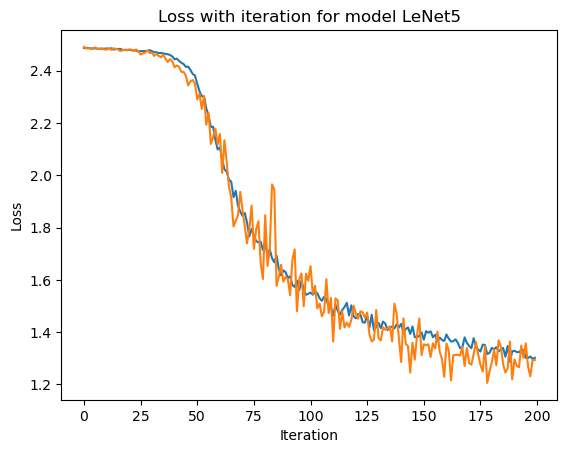

Class weights: tensor([0.0668, 0.1378, 0.0348, 0.0814, 0.1279, 0.1337, 0.0973, 0.0409, 0.0381,
        0.1178, 0.0570, 0.0663])
AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 

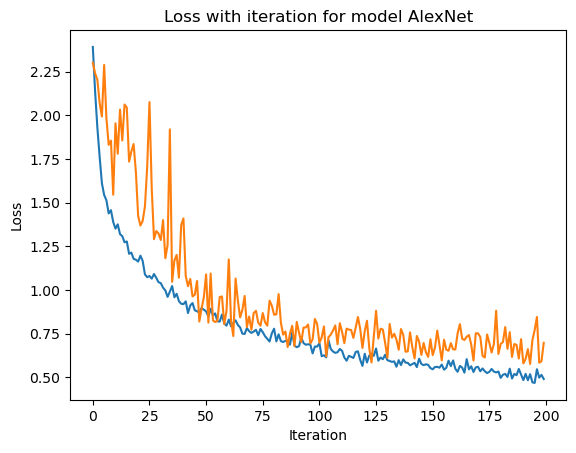

In [14]:
%%script echo skipping
print("cell skipped")

import torch.optim as optim

for model_name, model_class in models:
    class_weights = get_class_weights(data=plankton_data)
    net = model_class().cuda()
    criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()
    optimizer = optim.SGD(net.parameters(), **models_params[model_name])
    train_model(net=net, criterion=criterion, optimizer=optimizer, loaders=loaders, model_name=model_name)

### Load models

In [37]:
# %%script echo skipping
# print("cell skipped")

!wget -O AlexNet.pt "https://github.com/PhilipZubel/cnn-image-classifier/blob/main/AlexNet.pt?raw=true" 
!wget -O LeNet5.pt "https://github.com/PhilipZubel/cnn-image-classifier/blob/main/LeNet5.pt?raw=true" 

--2023-03-11 22:25:20--  https://github.com/PhilipZubel/cnn-image-classifier/blob/main/AlexNet.pt?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/PhilipZubel/cnn-image-classifier/raw/main/AlexNet.pt [following]
--2023-03-11 22:25:20--  https://github.com/PhilipZubel/cnn-image-classifier/raw/main/AlexNet.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PhilipZubel/cnn-image-classifier/main/AlexNet.pt [following]
--2023-03-11 22:25:20--  https://raw.githubusercontent.com/PhilipZubel/cnn-image-classifier/main/AlexNet.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connecte

### Evaluation

In [38]:
def get_accuracy(loader, model, model_name, loader_type):
  correct_pred = {classname.item(): 0 for classname in classes}
  total_pred = {classname.item(): 0 for classname in classes}

  true_labels = []
  pred_labels = []

  # again no gradients needed
  with torch.no_grad():
      for t_data in loader:
          images, labels = t_data
          labels = labels.long()
          outputs = model(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label_torch, prediction in zip(labels, predictions):
            pred = prediction.item()
            label = label_torch.item()
            true_labels.append(pred)
            pred_labels.append(label)
            if label == pred:
              correct_pred[label] += 1
            total_pred[label] += 1


  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:1f} is {accuracy:.1f} %')

  total_accuracy = 100 * sum(correct_pred.values()) / sum(total_pred.values())

  print(f"Total accuracy {total_accuracy} %")

  from sklearn.metrics import ConfusionMatrixDisplay

  ConfusionMatrixDisplay.from_predictions(
      true_labels, pred_labels, labels=classes
  )

  return total_accuracy

Accuracy train
Accuracy for class: 0.000000 is 18.2 %
Accuracy for class: 1.000000 is 26.8 %
Accuracy for class: 2.000000 is 65.8 %
Accuracy for class: 3.000000 is 7.1 %
Accuracy for class: 4.000000 is 40.7 %
Accuracy for class: 5.000000 is 88.5 %
Accuracy for class: 6.000000 is 38.7 %
Accuracy for class: 7.000000 is 19.4 %
Accuracy for class: 8.000000 is 57.6 %
Accuracy for class: 9.000000 is 100.0 %
Accuracy for class: 10.000000 is 18.5 %
Accuracy for class: 11.000000 is 75.2 %
Total accuracy 45.13137557959814 %
Accuracy test
Accuracy for class: 0.000000 is 50.0 %
Accuracy for class: 1.000000 is 25.0 %
Accuracy for class: 2.000000 is 64.5 %
Accuracy for class: 3.000000 is 7.1 %
Accuracy for class: 4.000000 is 83.3 %
Accuracy for class: 5.000000 is 87.5 %
Accuracy for class: 6.000000 is 28.6 %
Accuracy for class: 7.000000 is 18.5 %
Accuracy for class: 8.000000 is 57.9 %
Accuracy for class: 9.000000 is 100.0 %
Accuracy for class: 10.000000 is 10.5 %
Accuracy for class: 11.000000 is 72.

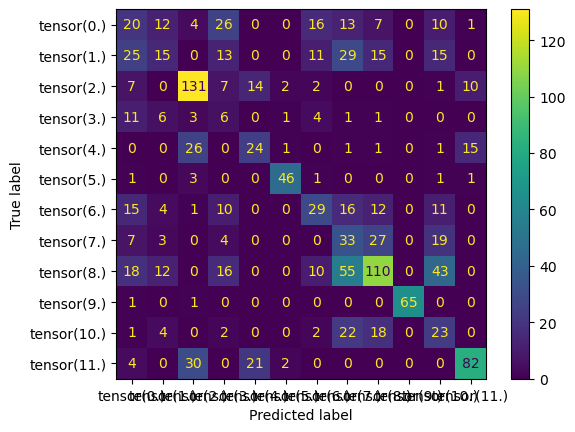

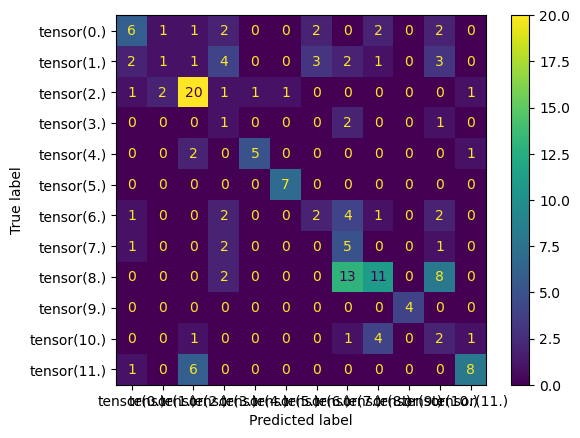

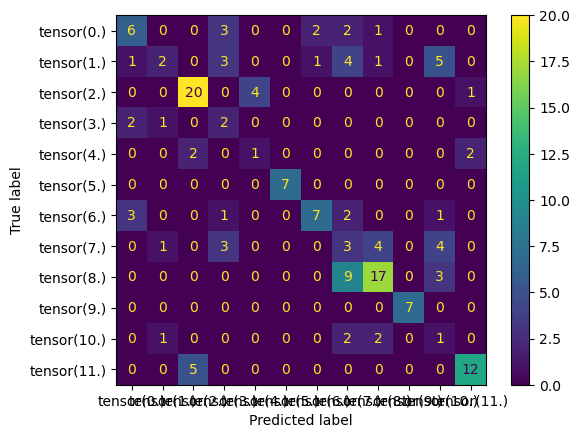

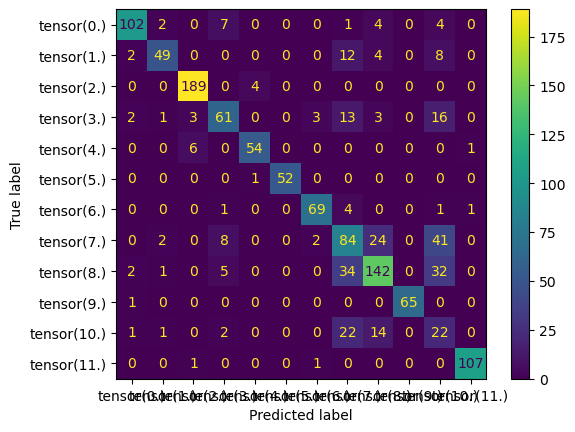

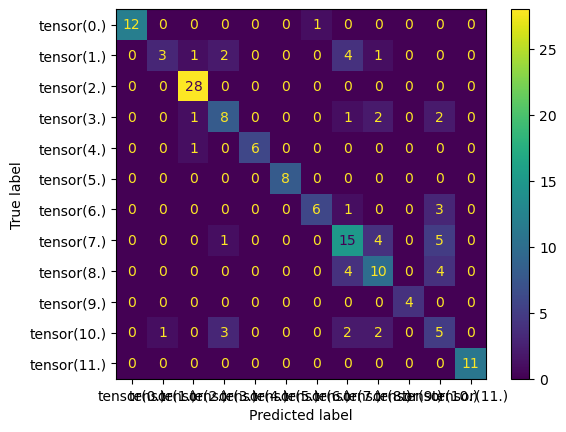

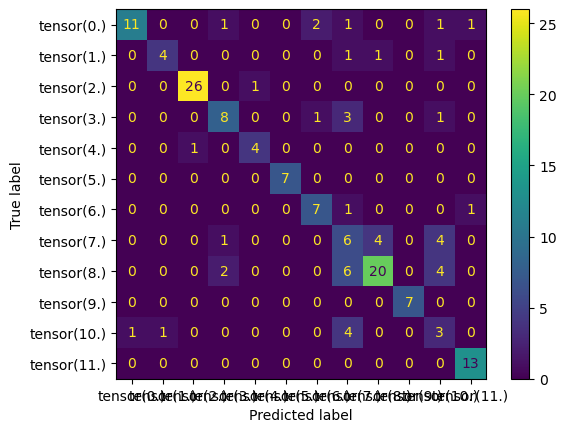

In [39]:
train_loader, test_loader, valid_loader = loaders

accuracies = {}

for model_name, model_class in models:
    model_path = os.path.join(os.getcwd(), f"{model_name}.pt") 
    model = model_class()
    model.load_state_dict(torch.load(model_path))
    print("Accuracy train")
    train_accuracy = get_accuracy(train_loader, model, model_name, loader_type="train")
    print("Accuracy test")
    test_accuracy = get_accuracy(test_loader, model, model_name, loader_type="test")
    print("Accuracy validation")
    valid_accuracy = get_accuracy(valid_loader, model, model_name, loader_type="valid")
    accuracies[model_name] = {"train": train_accuracy, "test": test_accuracy, "valid": valid_accuracy}

### Results

In [40]:

results = pd.DataFrame(accuracies).T

results


,train,test,valid
LeNet5,45.131376,44.444444,52.795031
AlexNet,76.970634,71.604938,72.049689
